ETF gold chosen is SPDR Gold Shares

Equity ETF from outside the US chosen is SPDR® Portfolio Europe ETF


<Figure size 432x288 with 0 Axes>

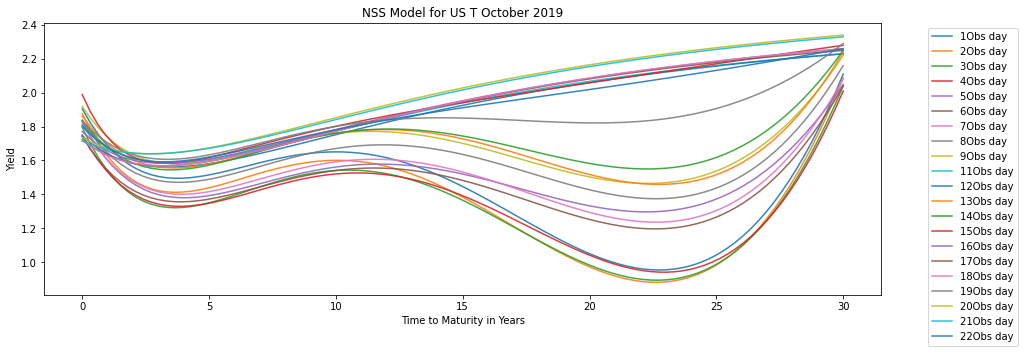

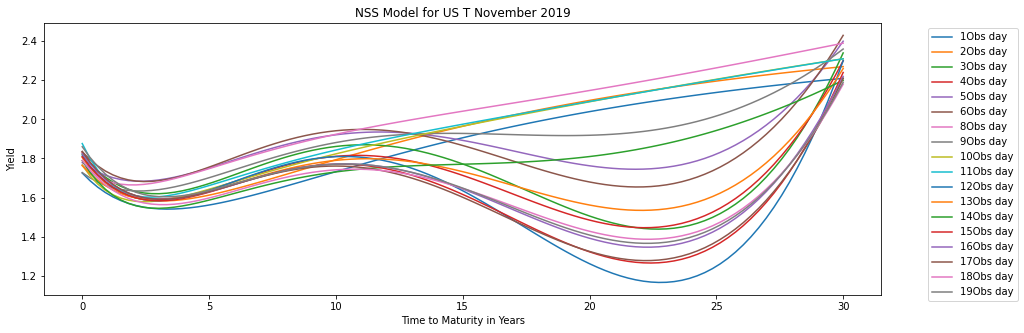

In [11]:
from pandas_datareader.data import DataReader as dr
import nelson_siegel_svensson as nls 
from nelson_siegel_svensson import NelsonSiegelSvenssonCurve
from nelson_siegel_svensson.calibrate import calibrate_ns_ols
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.pyplot import plot
import ast
import re
start = datetime.datetime(2019, 10, 1)
end = datetime.datetime(2019, 11, 30)
syms = ['DGS30','DGS10','DGS7', 'DGS5','DGS3', 'DGS2']
yc = dr(syms, 'fred',start,end) # could specify start date with start param here
names = dict(zip(syms, ['30yr','10yr','7yr','5yr', '3yr','2yr']))
yc = yc.rename(columns=names)
yc = yc[[ '2yr', '3yr','5yr','7yr', '10yr','30yr']]


y=yc[[ '2yr', '3yr','5yr','7yr', '10yr','30yr']]
list1 = [ '2yr', '3yr','5yr','7yr', '10yr','30yr']




#NSS Model
y=y.values.tolist()
obs_october=len(yc.loc[datetime.datetime(2019, 10, 1):datetime.datetime(2019, 10, 31)])
obs_november=len(yc.loc[datetime.datetime(2019, 11, 1):datetime.datetime(2019, 11, 30)])

###betas and tau for october NSS model
fig_NSS_octo=plt.figure()
betas_october = np.zeros((obs_october, 6)) ###variable contains both betas and tau
fig, ax = pylab.subplots(figsize=(15,5))
for x in range(0, obs_october-1):
 y=np.array(yc.iloc[x])
 t=np.array([2,3,5,7,10,30])
 if np.all(y >= 0.6):
  curve, nls_c=nls.calibrate.calibrate_nss_ols(t=t,y=y) 
  curve=str(curve)
  betas_october[x]=re.findall('-?\d+\.*\d+',curve) #match numbers that are only at least two digits long
  betas_october[x]=betas_october[x].astype(float)
  #y = NelsonSiegelSvenssonCurve(beta0=betas_october[x,0],beta1=betas_october[x,1],beta2=betas_october[x,2],beta3=betas_october[x,3],  tau1=betas_october[x,4],tau2=betas_october[x,5])
  if np.all(betas_october[x] != 0):
   yy= NelsonSiegelSvenssonCurve(betas_october[x,0],betas_october[x,1],betas_october[x,2],betas_october[x,3],  betas_october[x,4],betas_october[x,5])
  t = np.linspace(0, 30, 100)
  ax.plot(t, yy(t),label=f'{x+1}Obs day',alpha=0.9)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Time to Maturity in Years')
plt.ylabel('Yield')
plt.title('NSS Model for US T October 2019')
plt.show()
figNOV, axNSSNOV = pylab.subplots(figsize=(15,5))

betas_nov = np.zeros((obs_november, 6)) ###variable contains both betas and tau
for x in range(0, obs_november-1):
 y=np.array(yc.iloc[obs_october+x])
 t=np.array([2,3,5,7,10,30])
 if np.all(y >= 0.6):
  curve, nls_c=nls.calibrate.calibrate_nss_ols(t=t,y=y) 
  curve=str(curve)
  betas_nov[x]=re.findall('-?\d+\.*\d+',curve) #match numbers that are only at least two digits long
  if np.all(betas_nov[x] != 0):
   yy= NelsonSiegelSvenssonCurve(betas_nov[x,0],betas_nov[x,1],betas_nov[x,2],betas_nov[x,3],  betas_nov[x,4],betas_nov [x,5])
  t = np.linspace(0, 30, 100)
  axNSSNOV.plot(t, yy(t),label=f'{x+1}Obs day')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Time to Maturity in Years')
plt.ylabel('Yield')
plt.title('NSS Model for US T November 2019')
plt.show()
